# GRIP Task1: Prediction using supervised ML

## Gundabattula Madhuri

 ### Data Science & Business Analytics intern at The Sparks Foundation
 

 ### Aim: Predict the percentage of an student based on the no. of study hours.

### Question: What will be predicted score if a student studies for 9.25 hrs/ day? 

### Dataset : Data can be found at http://bit.ly/w-data

## Importing Libraries

In [50]:
#importing required libraries.

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

## Load Scores.csv Dataset into a dataframe

In [51]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


## Plotting the data points for a relation

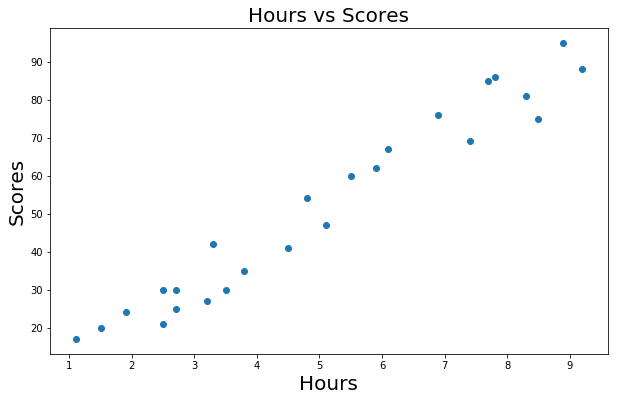

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(df.Hours,df.Scores)
plt.xlabel('Hours', size=20)
plt.ylabel("Scores",  size=20)
plt.title('Hours vs Scores',  size=20)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### Plot the regression line to confirm the correlation

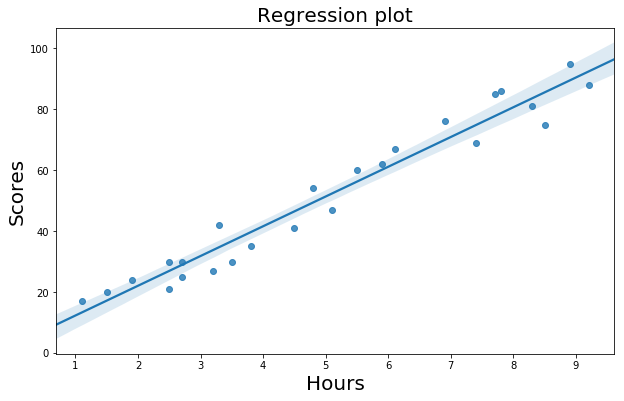

In [53]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x=df['Hours'],y=df['Scores'], ax=ax)
plt.xlabel('Hours',size=20)
plt.ylabel('Scores',size=20)
plt.title('Regression plot',size=20)
plt.show()

### Correlation between 'hours' and 'score'

In [26]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**from above it is confirmed that 2 variables are positively correlated.**

## Define X input and y output

In [54]:
X = df.drop(["Scores"], axis=1)
y = df["Scores"]

## Split the dataset into Train and Test sets

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Create the LinearRegression model object and call fit() to fit the model to training set

In [56]:
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

## Predict the y with Test dataset using model object's predict() 

In [57]:
y_pred = model.predict(X_test)

## Plotting test data using the trained dataset

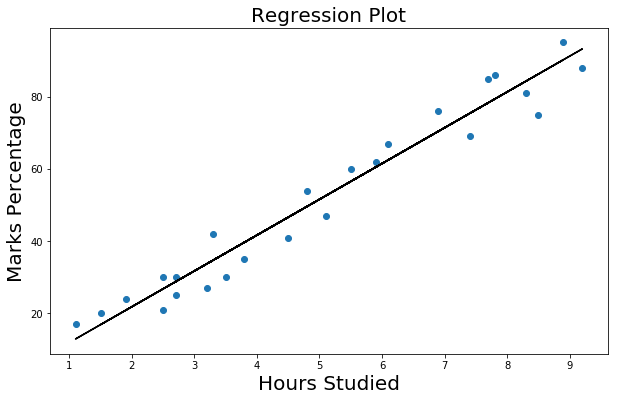

In [58]:
line = lin_reg.coef_*X+lin_reg.intercept_

# Plotting for the test data
plt.figure(figsize=(10,6))
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=20)
plt.xlabel('Hours Studied', size=20)
plt.scatter(X, y)
plt.plot(X, line, c='k');
plt.show()

### Comparing actual vs predicted

In [63]:
# comparing actual y_test and pred_y data we get.
data=pd.DataFrame({'Actual':y_test,'predicted':y_pred,'Difference/Error':y_test-y_pred})
data

,Actual,predicted,Difference/Error
5,20,16.884145,3.115855
2,27,33.732261,-6.732261
19,69,75.357018,-6.357018
16,30,26.794801,3.205199
11,62,60.491033,1.508967


## The predicted score if a student studies for 9.25 hrs/day.

In [65]:
print('Predicted score if a student studies for 9.25 hrs/day', lin_reg.predict([[9.25]]))


Predicted score if a student studies for 9.25 hrs/day [93.69173249]
